In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
BLS_data = pd.read_csv("Historical_data_BLS_2018.csv")
BLS_data.head()

,area,year,area_title,area_type,naics,naics_title,own_code,occ_code,occ_title,o_group,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,99,2018,U.S.,1,0,Cross-industry,1235,00-0000,All Occupations,total,...,18.58,30.06,47.31,"20,690","25,740","38,640","62,510","98,410",NaN,NaN
1,99,2018,U.S.,1,0,Cross-industry,1235,11-0000,Management Occupations,major,...,50.11,72.93,#,"49,260","70,880","104,240","151,700",#,NaN,NaN
2,99,2018,U.S.,1,0,Cross-industry,1235,11-1000,Top Executives,minor,...,49.73,78.81,#,"43,400","66,000","103,450","163,930",#,NaN,NaN
3,99,2018,U.S.,1,0,Cross-industry,1235,11-1010,Chief Executives,broad,...,91.15,#,#,"68,360","115,960","189,600",#,#,NaN,NaN
4,99,2018,U.S.,1,0,Cross-industry,1235,11-1011,Chief Executives,detailed,...,91.15,#,#,"68,360","115,960","189,600",#,#,NaN,NaN


In [3]:

US_data = BLS_data[BLS_data["area_type"] == 1]
US_data.drop(["own_code","annual", "occ_code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
US_data.dropna(axis=1, inplace=True)

State_data= BLS_data[(BLS_data["area_type"] == 2) & (BLS_data["area_title"] != "District of Columbia")]
State_data.drop(["own_code","annual", "occ_code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
State_data.dropna(axis=1, inplace=True)

US_data.head()

,year,area_title,occ_title,o_group,tot_emp,emp_prse,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
0,2018,U.S.,All Occupations,total,"144,733,270",0.1,24.98,"51,960",0.1,9.95,12.37,18.58,30.06,47.31,"20,690","25,740","38,640","62,510","98,410"
1,2018,U.S.,Management Occupations,major,"7,616,650",0.2,58.44,"121,560",0.1,23.68,34.08,50.11,72.93,#,"49,260","70,880","104,240","151,700",#
2,2018,U.S.,Top Executives,minor,"2,535,640",0.3,61.66,"128,240",0.2,20.86,31.73,49.73,78.81,#,"43,400","66,000","103,450","163,930",#
3,2018,U.S.,Chief Executives,broad,"195,530",0.7,96.22,"200,140",0.5,32.86,55.75,91.15,#,#,"68,360","115,960","189,600",#,#
4,2018,U.S.,Chief Executives,detailed,"195,530",0.7,96.22,"200,140",0.5,32.86,55.75,91.15,#,#,"68,360","115,960","189,600",#,#


In [4]:
State_data.head()

,year,area_title,occ_title,o_group,tot_emp,emp_prse,jobs_1000,loc_quotient,h_mean,a_mean,...,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
175951,2018,Alabama,All Occupations,total,"1,943,760",0.4,1000,1,21.05,"43,790",...,8.67,10.77,16.22,25.63,38.28,"18,030","22,400","33,740","53,310","79,630"
175952,2018,Alaska,All Occupations,total,"315,250",0.8,1000,1,28.22,"58,710",...,11.62,15.4,23.09,35.32,49.56,"24,180","32,020","48,020","73,460","103,080"
175953,2018,Arizona,All Occupations,total,"2,789,520",0.5,1000,1,23.7,"49,290",...,10.8,12.21,17.8,28.2,43.62,"22,470","25,410","37,020","58,660","90,730"
175954,2018,Arkansas,All Occupations,total,"1,210,120",0.6,1000,1,19.97,"41,540",...,9.19,10.75,15.31,23.62,35.25,"19,110","22,360","31,850","49,140","73,310"
175955,2018,California,All Occupations,total,"17,007,690",0.2,1000,1,28.44,"59,150",...,11.34,13.38,20.4,35.15,56.54,"23,590","27,830","42,430","73,110","117,590"


In [5]:
US_data_avg = US_data[US_data["o_group"] == "major"]
US_data_avg .drop_duplicates(["occ_title"], keep="first", inplace=True) 
US_data_avg ['a_mean'] = US_data_avg ['a_mean'].str.replace(',', '')  #remove comma in numbers
US_data_avg ['a_mean'] = US_data_avg ['a_mean'].str.replace('*', '0')
US_data_avg ['a_mean'] = US_data_avg ['a_mean'].astype(int)           #convert string to integers
US_data_avg .sort_values("a_mean", ascending = False, inplace=True)
US_data_avg [["occ_title", "a_mean"]].head(5)


,occ_title,a_mean
1,Management Occupations,121560
315,Legal Occupations,108690
126,Computer and Mathematical Occupations,91530
158,Architecture and Engineering Occupations,87370
489,Healthcare Practitioners and Technical Occupat...,82000


In [6]:
#total State Employment Rate for all different occupations by State for 2018
State_employment_rate = State_data[State_data["o_group"] == "total"]
State_employment_rate["tot_emp"] = State_employment_rate['tot_emp'].str.replace(',', '')  #remove comma in numbers
State_employment_rate["tot_emp"] = State_employment_rate["tot_emp"].astype(int)  
State_employment_rate.sort_values("tot_emp", ascending=False, inplace=True) #sorting the data for better visualization purposes
State_employment_rate[["area_title", "tot_emp"]].head()

,area_title,tot_emp
175955,California,17007690
175994,Texas,12113810
175983,New York,9385620
175960,Florida,8608660
175964,Illinois,5991270


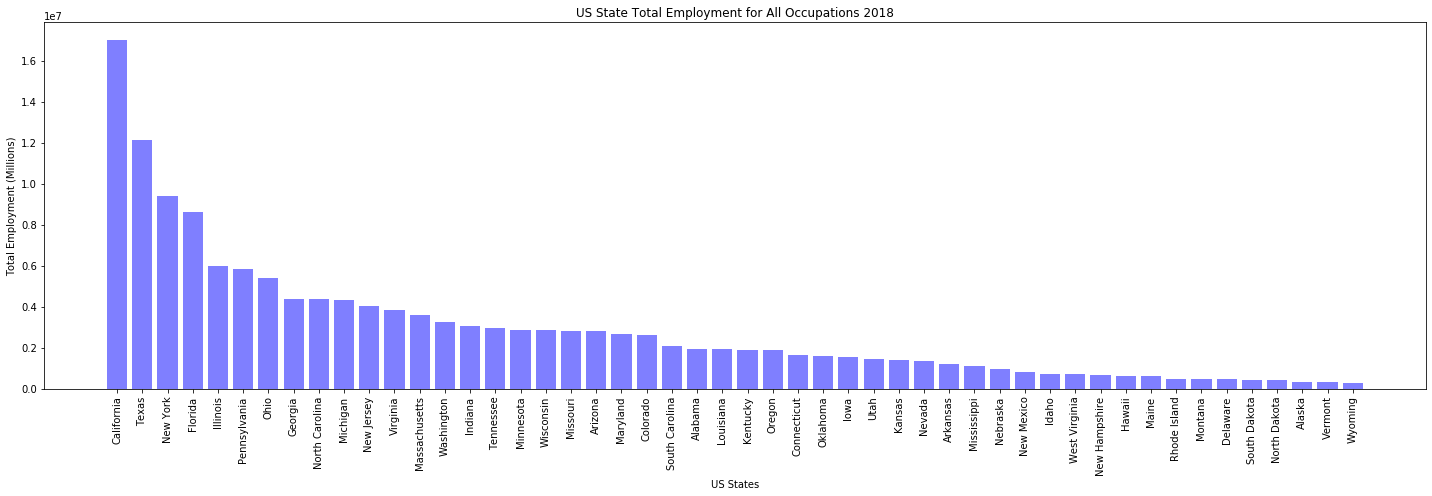

In [7]:
x = np.arange(50)
plt.figure(figsize=(20, 7))
plt.bar(x, State_employment_rate ["tot_emp"], color ="blue", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Total Employment (Millions)")
plt.title("US State Total Employment for All Occupations 2018")
plt.xticks(x, State_employment_rate ["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/emp_rate_bystate2018.png")
plt.show()

In [8]:
#State Average Annual Income 2018
State_avg_income= State_data[State_data["o_group"] == "total"]
State_avg_income["a_mean"] = State_avg_income['a_mean'].str.replace(',', '')  #remove comma in numbers
State_avg_income["a_mean"] = State_avg_income["a_mean"].astype(int)     
State_avg_income.sort_values("a_mean", ascending=False, inplace=True)
State_avg_income[["area_title", "a_mean"]].head(10)

,area_title,a_mean
175972,Massachusetts,63910
175983,New York,61870
175957,Connecticut,60780
175998,Washington,59410
175955,California,59150
175971,Maryland,58770
175952,Alaska,58710
175981,New Jersey,58210
175956,Colorado,55820
175997,Virginia,55310


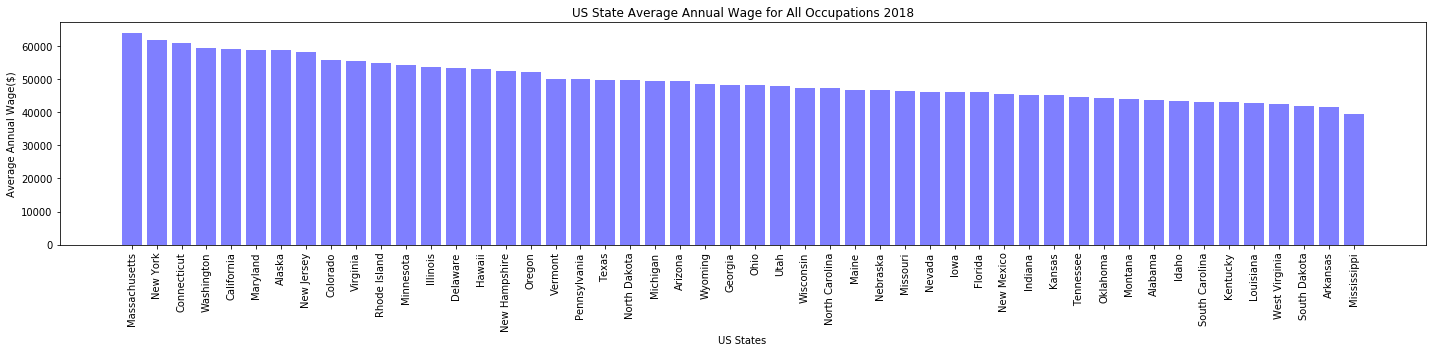

In [9]:

plt.figure(figsize=(20, 5))
plt.bar(x, State_avg_income["a_mean"], color = "blue", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Average Annual Wage($)")
plt.title("US State Average Annual Wage for All Occupations 2018")
plt.xticks(x, State_avg_income["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/US_Avg_annualwage_2018.png")
plt.show()

In [10]:
State_avg_income_hourly= State_data[State_data["o_group"] == "total"]
State_avg_income_hourly["h_mean"] = State_avg_income['h_mean'].str.replace(',', '')  #remove comma in numbers
State_avg_income_hourly["h_mean"] = State_avg_income["h_mean"].astype(str)     
State_avg_income_hourly.sort_values("h_mean", ascending=False, inplace=True)
State_avg_income_hourly[["area_title", "h_mean"]].head(10)

,area_title,h_mean
175972,Massachusetts,30.72
175983,New York,29.75
175957,Connecticut,29.22
175998,Washington,28.56
175955,California,28.44
175971,Maryland,28.25
175952,Alaska,28.22
175981,New Jersey,27.98
175956,Colorado,26.84
175997,Virginia,26.59


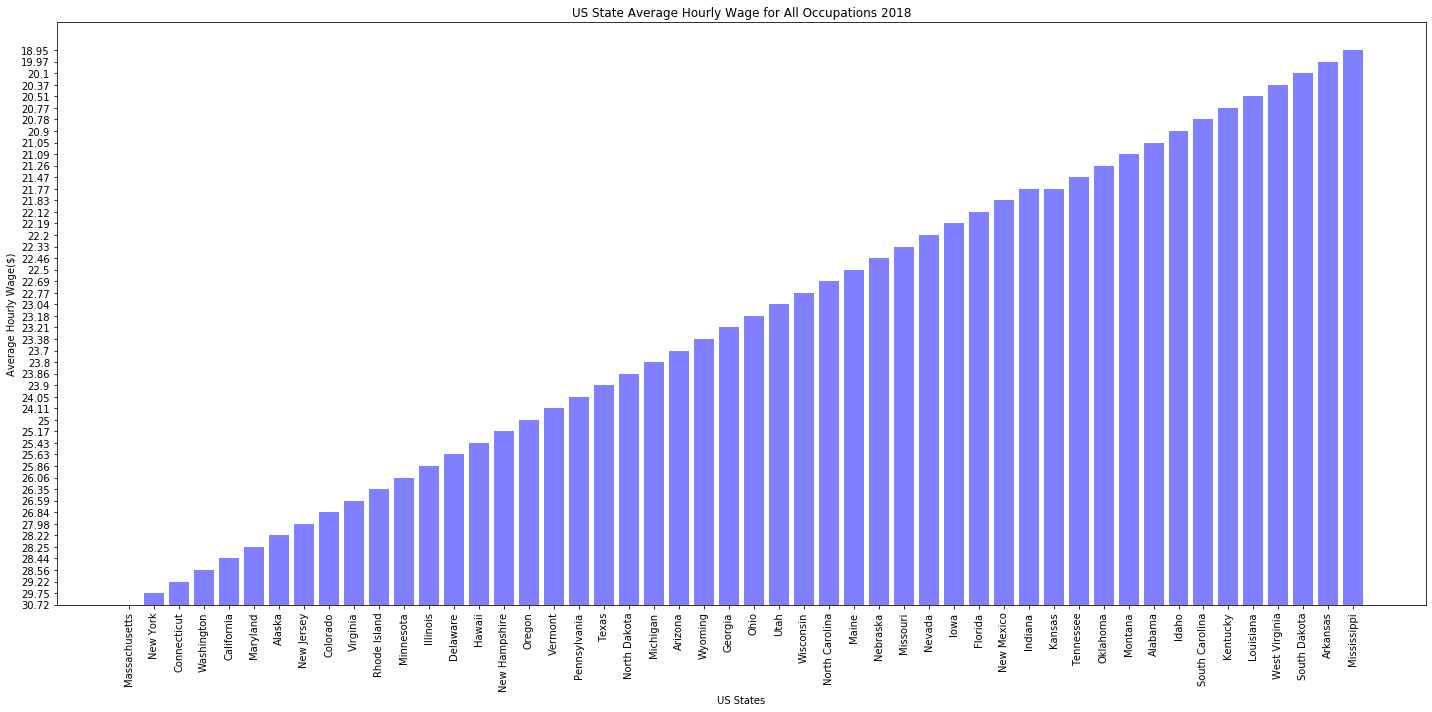

In [11]:
x = np.arange(50)
plt.figure(figsize=(20, 10))
plt.bar(x, State_avg_income_hourly["h_mean"], color = "blue", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Average Hourly Wage($)")
plt.title("US State Average Hourly Wage for All Occupations 2018")
plt.xticks(x, State_avg_income_hourly["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/US_Avg_hourlywage2018.png")
plt.show()

In [12]:
State_avg_income_hourly= State_data[State_data["o_group"] == "total"]
State_avg_income_hourly["h_mean"] = State_avg_income['h_mean'].str.replace(',', '')  #remove comma in numbers
State_avg_income_hourly["h_mean"] = State_avg_income["h_mean"].astype(str)     
State_avg_income_hourly.sort_values("h_mean", ascending=False, inplace=True)
State_avg_income_hourly[["area_title", "h_mean"]].head(10)

,area_title,h_mean
175972,Massachusetts,30.72
175983,New York,29.75
175957,Connecticut,29.22
175998,Washington,28.56
175955,California,28.44
175971,Maryland,28.25
175952,Alaska,28.22
175981,New Jersey,27.98
175956,Colorado,26.84
175997,Virginia,26.59


In [13]:
#Median Annual Income by State for 2018
State_median_income= State_data[State_data["o_group"] == "total"]
State_median_income["a_median"] = State_avg_income['a_median'].str.replace(',', '')  #remove comma in numbers
State_median_income["a_median"] = State_avg_income["a_median"].astype(str)     
State_median_income.sort_values("a_median", ascending=True, inplace=True)
State_median_income[["area_title", "a_median"]].head(10)

,area_title,a_median
175975,Mississippi,"30,580"
175954,Arkansas,"31,850"
175999,West Virginia,"32,640"
175969,Louisiana,"33,390"
175992,South Dakota,"33,450"
175951,Alabama,"33,740"
175991,South Carolina,"33,750"
175982,New Mexico,"34,120"
175963,Idaho,"34,260"
175987,Oklahoma,"34,560"


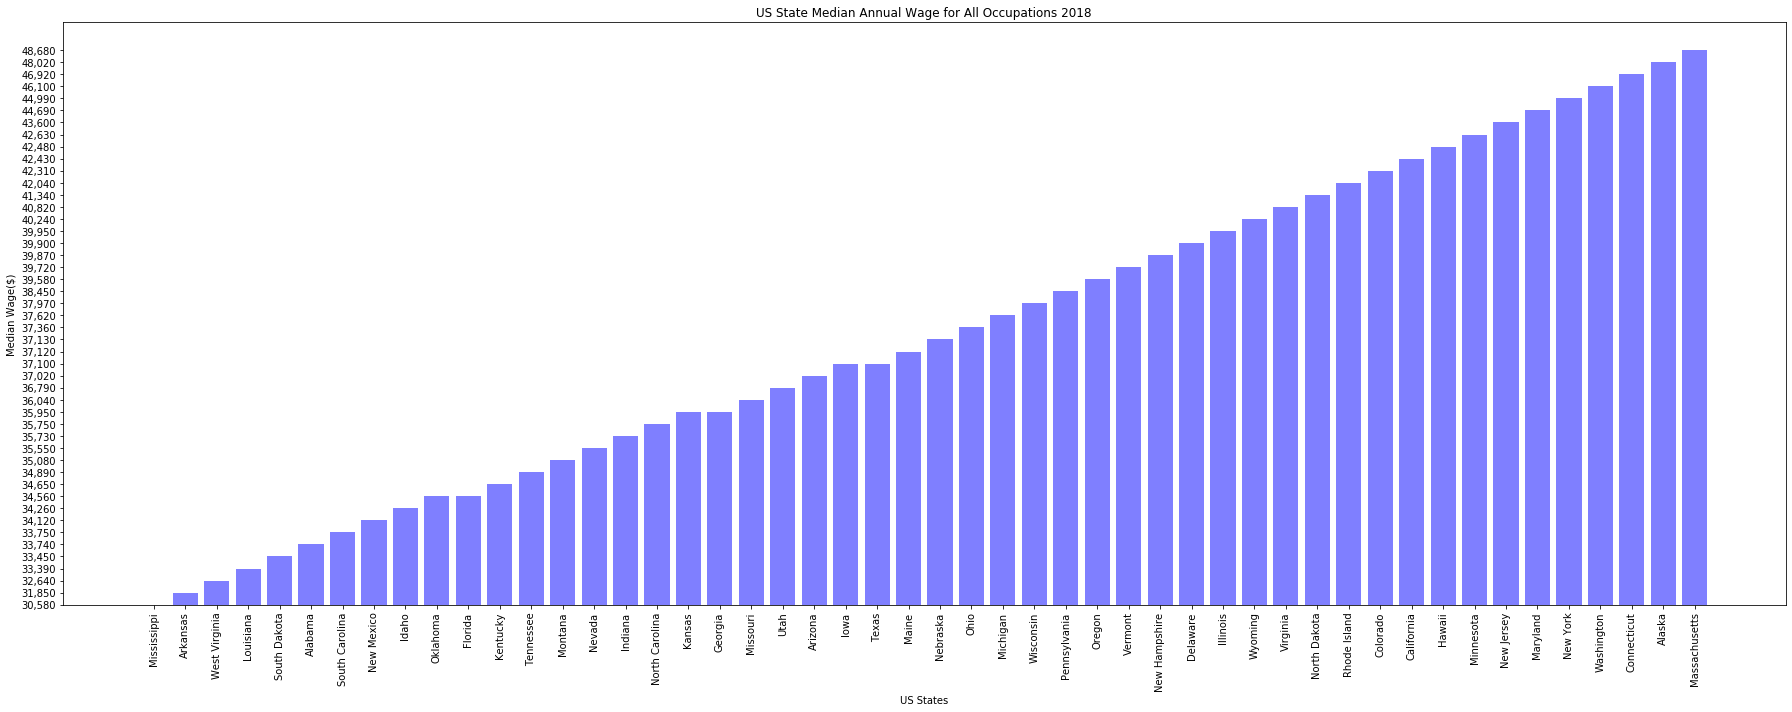

In [14]:
x = np.arange(50)
plt.figure(figsize=(25, 10))
plt.bar(x, State_median_income["a_median"], color = "blue", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Median Wage($)")
plt.title("US State Median Annual Wage for All Occupations 2018")
plt.xticks(x, State_median_income["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/US_Median_Annualwage2018.png")
plt.show()

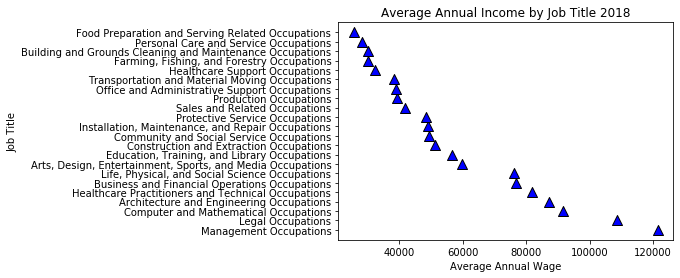

In [15]:
plt.scatter(US_data_avg["a_mean"],US_data_avg["occ_title"],edgecolors="black",facecolors="blue",s=100,marker="^")
plt.title("Average Annual Income by Job Title 2018")
plt.xlabel("Average Annual Wage")
plt.ylabel("Job Title")

#plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/Average Annual Income by Job Title2018.png")

plt.show()